# 11.2 SEM

As before, we will use the `HolzingerSwineford1939` dataset:

In [1]:
import semopy

data = semopy.examples.holzinger39.get_data()
data

id  sex  ageyr  agemo       school  grade        x1    x2     x3  \
1      1    1     13      1      Pasteur    7.0  3.333333  7.75  0.375   
2      2    2     13      7      Pasteur    7.0  5.333333  5.25  2.125   
3      3    2     13      1      Pasteur    7.0  4.500000  5.25  1.875   
4      4    1     13      2      Pasteur    7.0  5.333333  7.75  3.000   
5      5    2     12      2      Pasteur    7.0  4.833333  4.75  0.875   
..   ...  ...    ...    ...          ...    ...       ...   ...    ...   
297  346    1     13      5  Grant-White    8.0  4.000000  7.00  1.375   
298  347    2     14     10  Grant-White    8.0  3.000000  6.00  1.625   
299  348    2     14      3  Grant-White    8.0  4.666667  5.50  1.875   
300  349    1     14      2  Grant-White    8.0  4.333333  6.75  0.500   
301  351    1     13      5  Grant-White    NaN  4.333333  6.00  3.375   

           x4    x5        x6        x7    x8        x9  
1    2.333333  5.75  1.285714  3.391304  5.75  6.361111  
2    1.666667  3.00  1.285714  3.782609  6.25  7.916667  
3    1.000000  1.75  0.428571  3.260870  3.90  4.416667  
4    2.666667  4.50  2.428571  3.000000  5.30  4.861111  
5    2.666667  4.00  2.571429  3.695652  6.30  5.916667  
..        ...   ...       ...       ...   ...       ...  
297  2.666667  4.25  1.000000  5.086957  5.60  5.250000  
298  2.333333  4.00  1.000000  4.608696  6.05  6.083333  
299  3.666667  5.75  4.285714  4.000000  6.00  7.611111  
300  3.666667  4.50  2.000000  5.086957  6.20  4.388889  
301  3.666667  5.75  3.142857  4.086957  6.95  5.166667  

[301 rows x 15 columns]

## Performing SEM

As you know, CFA is a special case of SEM, which is defined by not having unidirectional paths present at one level, i.e. no latent variable is used to predict another latent variable (only correlations, i.e. bidirectional paths are used). But what if we suspect that one latent factor is actually predicting another one. Such models would be considered SEM.

Note that SEM models contain a **measurement model** and a **structural model**. The **measurement model** describes relationships between measured variables and latent factors. The **structural model** describes relationships between latent variables.

Let's specify and fit a SEM model that predicts `speed ability` with `visual speed` and ignores `text processing related abilities`.

      lval  op    rval  Estimate  Std. Err    z-value   p-value
0    speed   ~  visual  0.368338   0.08295   4.440492  0.000009
1       x1   ~  visual  1.000000         -          -         -
2       x2   ~  visual  0.689313  0.123415   5.585336       0.0
3       x3   ~  visual  0.984819  0.159891   6.159304       0.0
4       x7   ~   speed  1.000000         -          -         -
5       x8   ~   speed  1.203822  0.169823   7.088685       0.0
6       x9   ~   speed  1.051845  0.147314   7.140136       0.0
7    speed  ~~   speed  0.304732  0.071634   4.254029  0.000021
8   visual  ~~  visual  0.604528   0.12996   4.651641  0.000003
9       x1  ~~      x1  0.754319  0.110373   6.834275       0.0
10      x2  ~~      x2  1.094042  0.102616  10.661487       0.0
11      x3  ~~      x3  0.688536  0.104947   6.560781       0.0
12      x7  ~~      x7  0.796166  0.081598   9.757123       0.0
13      x8  ~~      x8  0.461362  0.076857    6.00289       0.0
14      x9  ~~      x9  0.586986  0.0709

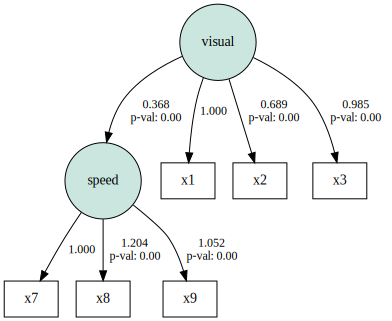

In [2]:
# Specify the model
desc = '''# Measurement model
          visual =~ x1 + x2 + x3
          speed =~ x7 + x8 + x9

          # Structural model
          speed ~ visual'''

# Fit the model
model = semopy.Model(desc)
results = model.fit(data)

# Print the estimates and fit measures
estimates = model.inspect()
print(estimates)

stats = semopy.calc_stats(model)
print(stats.T)

# Visualize the model
semopy.semplot(model, plot_covs = True, filename='data/sem_plot.pdf')

### Model estimates

For a guide on how to interpret loadings, (co)variances and residuals, please refer to the previous chapter.

However, notice the the newly added regression: `speed ~ visual`. The `Estimate` column can be refered as the slope of the added regression, meaning that a one unit increase in `visual` comes **on average** with a 0.37 unit increase in `speed`. As indicated by the `p-value`, this coefficient is significantly different from zero. With that, we can infer that `visual` is significantly predicting `speed`.

### Fit measures

To assess model fit, let's look at the fit measures (please refer to the previous chapter for details). The significant $\chi^2$-Test indicates that the model implied covariance matrix is significantly different from the empirical one. Furthermore, TLI (0.77), RMSEA (0.13) and CFI (0.88) are not in the desired windows, indicating bad fit.